# Explore here

In [422]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import math
from operator import itemgetter
import utils as eda
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
total_data = pd.read_csv(url)  

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [423]:
#IDENTIFICO VARIABLES
# Variables numéricas
numericas = total_data.select_dtypes(include=['number']).columns.tolist()
print("Variables numéricas:", numericas)

# Variables no numéricas (categóricas, texto, etc.)
#no_numericas = total_data.select_dtypes(exclude=['number']).columns.tolist()
#print("Variables no numéricas:", no_numericas) 

no_numericas = total_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variables no numéricas:", no_numericas)

target = 'charges'
target

Variables numéricas: ['age', 'bmi', 'children', 'charges']
Variables no numéricas: ['sex', 'smoker', 'region']


'charges'

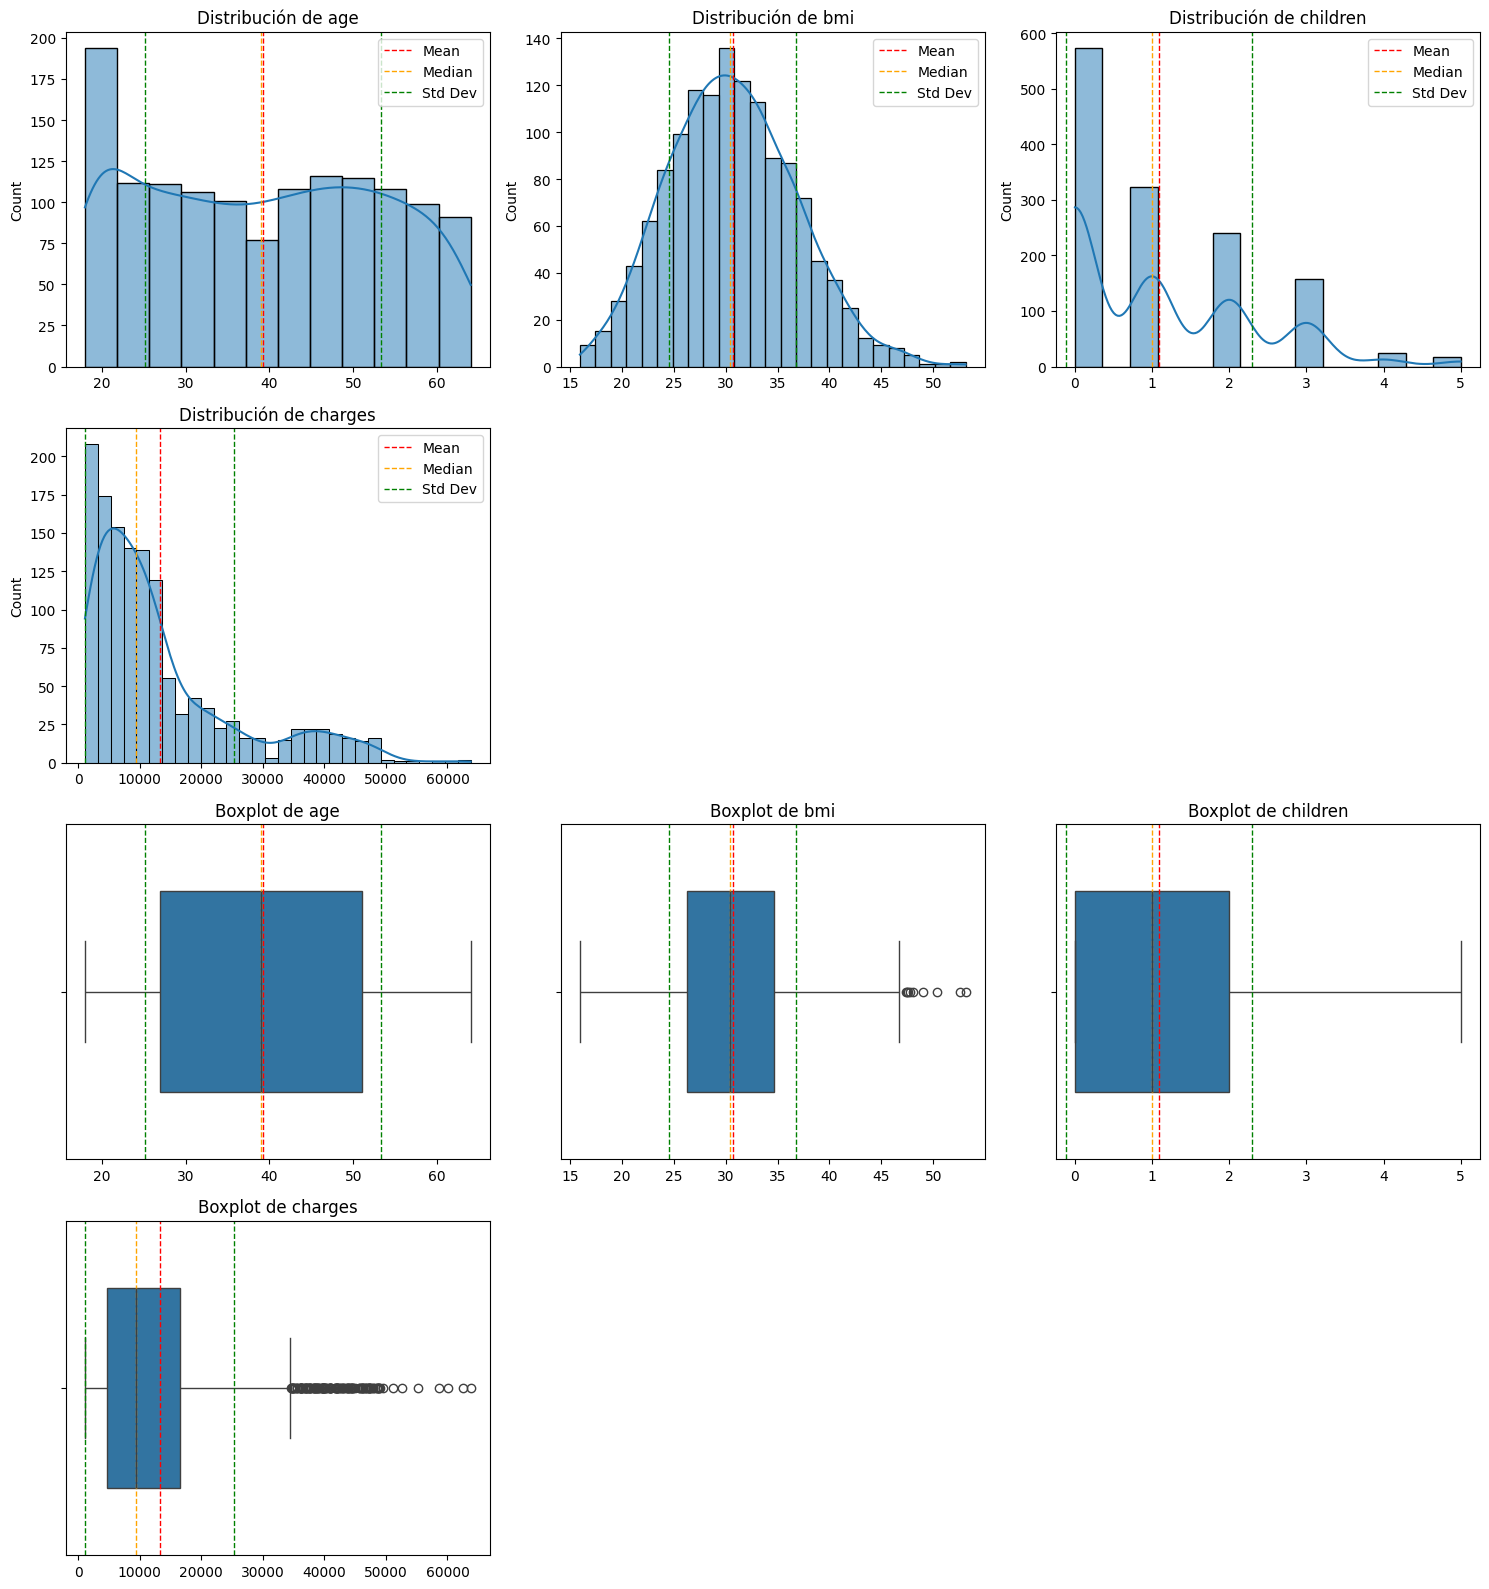

In [424]:
eda.plot_numerical_data(total_data) 

Analisis de resultados: 
1. age:
Probablemente verás que la distribución está sesgada hacia edades jóvenes o adultas jóvenes, con una mediana y media cercanas. La desviación estándar indicara la dispersion de edades. El boxplot puede mostrar si hay valores atípicos.

2. Índice de masa corporal (bmi):
Se puede observar la distribución es simétrica, hay valores extremos (muy bajos o muy altos de 30 ). El boxplot mostrará la dispersión y posibles outliers.

3. children:
Al ser una variable discreta, el histograma mostrará la frecuencia de cada número de hijos. La media y mediana darán una idea del número típico de hijos. El boxplot puede mostrar si hay familias con muchos hijos (outliers).

4. charges:
Esta variable parece muy sesgada, con muchos valores bajos y algunos muy altos. La diferencia entre media y mediana puede ser grande, indicando asimetría. El boxplot muestra
 los valores extremos.

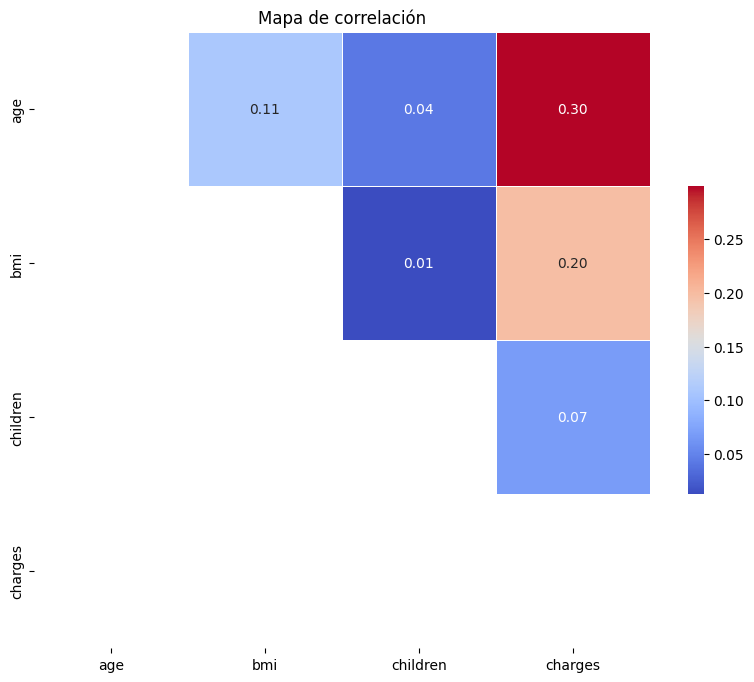

In [425]:
# MAPA DE DE CORRELACION EN VARIABLES NUMENICAS
eda.heatmap_correlation(total_data)

Analisis: de resultados: 
La variable target charges está más relacionada con age y bmi.
children parece tener poco impacto en los costos.
Las variables predictoras no están fuertemente correlacionadas entre sí, lo que es positivo para la estabilidad del modelo.

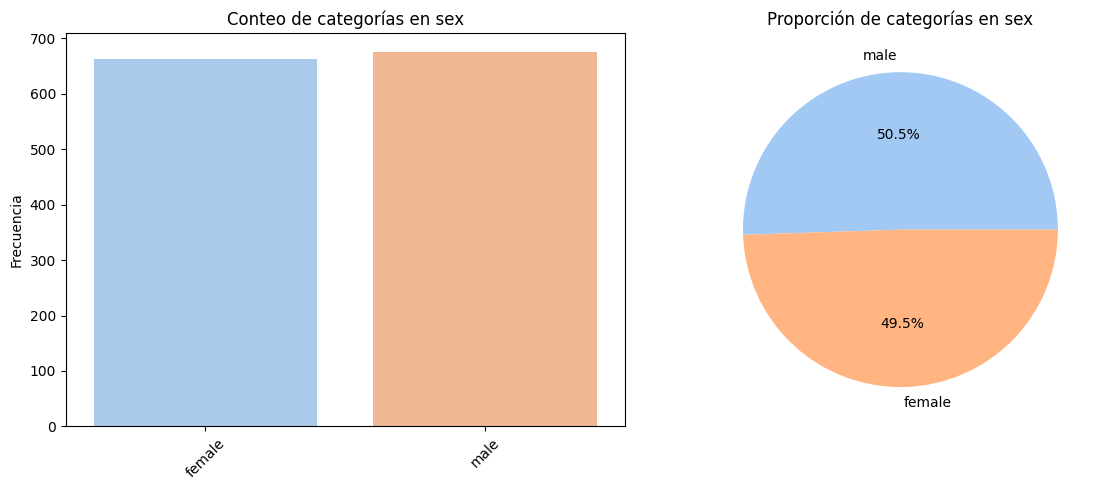

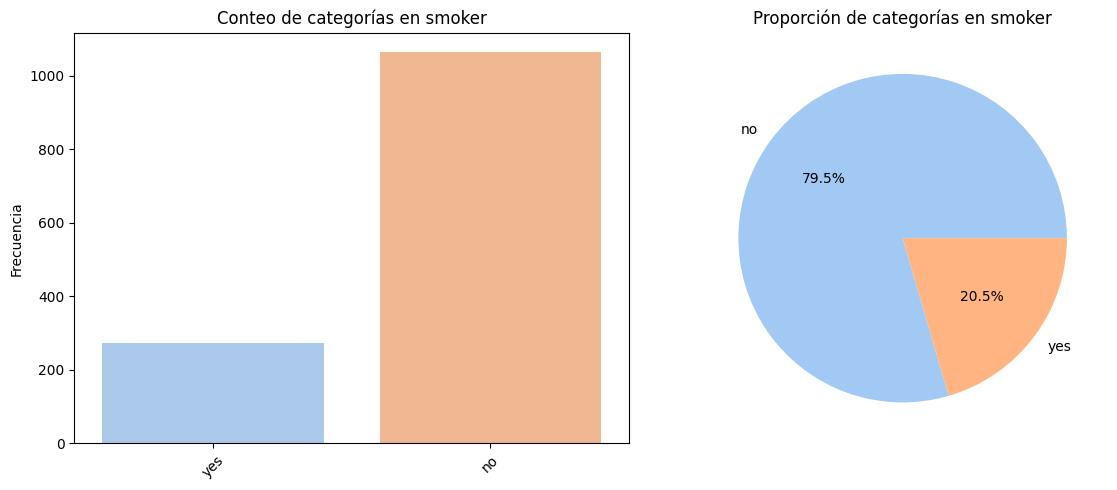

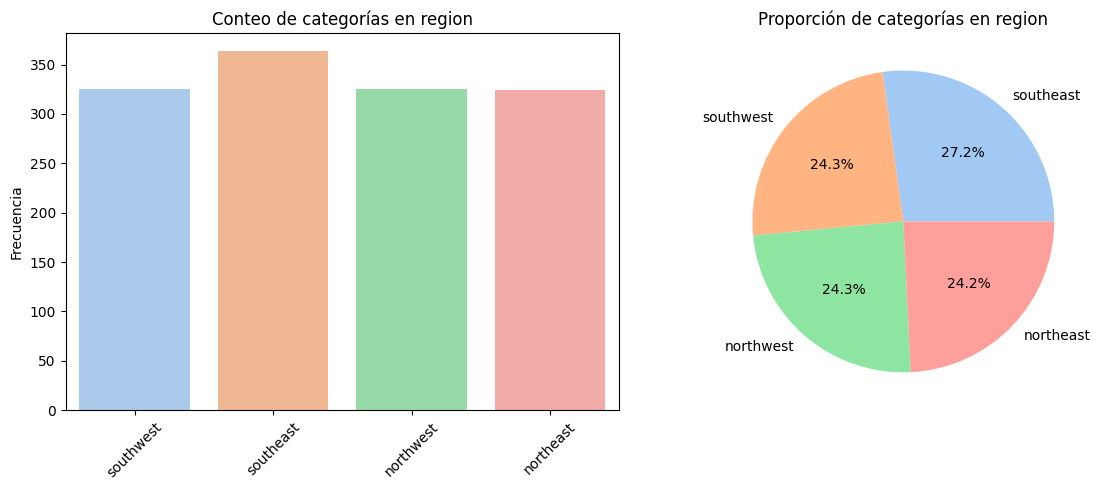

In [426]:
#ANALISIS VARIABLES CATEGORICAS
eda.plot_categorical_data(total_data)

Analisis de datos:
1. sex: La distribucion entre hombres y mujeres es bastante equilibrada, aunque puede haber una ligera predominancia de un sexo sobre otro. Esto indica que el dataset tiene representación de ambos generos para el analisis.

2. Fumador smoker: Hay una mayoría clara de no fumadores frente a fumadores. Esto es importante porque fumar suele influir significativamente en los costos del seguro médico, y la diferencia en proporciones puede afectar el modelo.

3. Región region: Las cuatro regiones (southwest, southeast, northwest, northeast) estan representadas, pero puede haber diferencias en la cantidad de datos por región. Esto puede reflejar variaciones geográficas en costos o características de los asegurados.

Correlaciones con la variable objetivo 'charges':
age         0.299008
bmi         0.198341
children    0.067998
dtype: float64


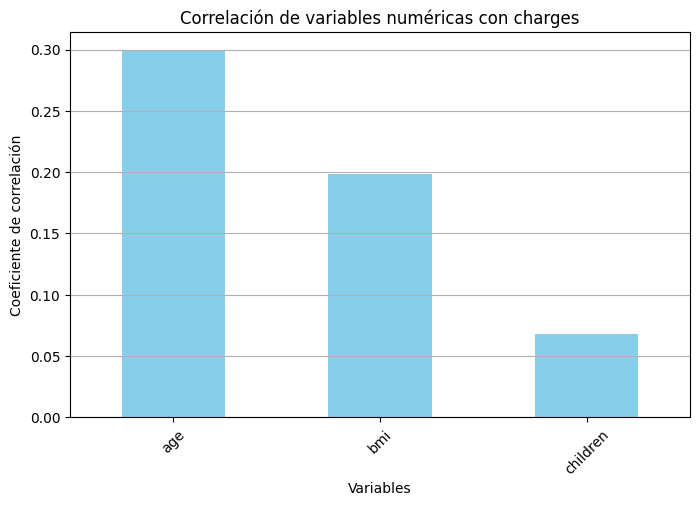

In [427]:
#CORRELACION ENTRE VARIABLES NUMERICAS Y LA TARGET
eda.correlation_num_target(total_data, target)

Analisis de resultados:

Las variables bmi y age son buenos predictores numericos para el charges. La variable children probablemente no aporte mucho valor predictivo para este modelo

In [428]:

#eda.process_dataframes_shapes(total_data, target)


In [429]:
# DATASET TOTAL_DATA SIN OUTLAIERS

total_data_no_outliers=total_data.copy()

def adjust_outliers(data, target):
    df_adj = data.copy()
    numeric_cols = df_adj.select_dtypes(include=['float64', 'int64']).columns.drop(target)
    for col in numeric_cols:
        Q1 = df_adj[col].quantile(0.25)
        Q3 = df_adj[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_adj[col] = np.where(df_adj[col] < lower_bound, lower_bound, df_adj[col])
        df_adj[col] = np.where(df_adj[col] > upper_bound, upper_bound, df_adj[col])
    return df_adj

total_data_no_outliers = adjust_outliers(total_data, target='charges')
total_data_no_outliers

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [430]:
# DATASET TOTAL_DATA CON OUTLAIERS FACTORIZADO
total_data_factorized = total_data.copy()

for col in no_numericas:
    total_data_factorized[col] = total_data_factorized[col].astype('category').cat.codes

total_data_factorized.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [431]:
#DATASET TOTAL_DATA SIN OUTLAIERS FACTORIZADO
total_data_no_outliers_factorized = total_data_no_outliers.copy()

for col in no_numericas:
   total_data_no_outliers_factorized[col] = total_data_no_outliers_factorized[col].astype('category').cat.codes

total_data_no_outliers_factorized.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [432]:
# DATASET TRAIN / TEST TOTAL_DATA CON OUTLAIERS FACTORIZADO 
target = 'charges'

x = total_data_factorized.drop(columns=[target])
y = total_data_factorized[target]

x_train_total_data_factorized, x_test_total_data_factorized, _, _ = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Tamaño x_train_total_data_factorized:", x_train_total_data_factorized.shape)
print("Tamaño x_test_total_data_factorized:", x_test_total_data_factorized.shape)


Tamaño x_train_total_data_factorized: (1070, 6)
Tamaño x_test_total_data_factorized: (268, 6)


In [433]:
# DATASET TRAIN / TEST TOTAL_DATA SIN OUTLAIERS FACTORIZADO

x = total_data_no_outliers_factorized.drop(columns=['charges'])
y = total_data_no_outliers_factorized['charges']

x_train_total_data_no_outlaiers_factorized, x_test_total_data_no_outlaiers_factorized, _, _= train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Tamaño x_train_no_outlaiers_factorized:",x_train_total_data_no_outlaiers_factorized)
print("Tamaño x_test_no_outlaiers_factorized:", x_test_total_data_no_outlaiers_factorized)


Tamaño x_train_no_outlaiers_factorized:        age  sex     bmi  children  smoker  region
560   46.0    0  19.950       2.0       0       1
1285  47.0    0  24.320       0.0       0       0
1142  52.0    0  24.860       0.0       0       2
969   39.0    0  34.320       5.0       0       2
486   54.0    0  21.470       3.0       0       1
...    ...  ...     ...       ...     ...     ...
1095  18.0    0  31.350       4.0       0       0
1130  39.0    0  23.870       5.0       0       2
1294  58.0    1  25.175       0.0       0       0
860   37.0    0  47.290       2.0       1       3
1126  55.0    1  29.900       0.0       0       3

[1070 rows x 6 columns]
Tamaño x_test_no_outlaiers_factorized:        age  sex     bmi  children  smoker  region
764   45.0    0  25.175       2.0       0       0
887   36.0    0  30.020       0.0       0       1
890   64.0    0  26.885       0.0       1       1
1293  46.0    1  25.745       3.0       0       1
259   19.0    1  31.920       0.0       1     

In [434]:
# DATASET TRAIN/ TEST TOTAL_DATA FACTORIZADOS ESTANDARIZADOS 

def scale_dataset_standard(dataframe):
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()
    
    dataframe_scaled = dataframe.copy()
    scaler = StandardScaler()
    dataframe_scaled[dataframe_scaled.columns] = scaler.fit_transform(dataframe_scaled[dataframe_scaled.columns])
    return dataframe_scaled   

x_train_total_data_factorized_standard = scale_dataset_standard(x_train_total_data_factorized)
x_test_total_data_factorized_standard = scale_dataset_standard(x_test_total_data_factorized)
x_train_total_data_no_oulaiers_factorized_standard = scale_dataset_standard(x_train_total_data_no_outlaiers_factorized)
x_test_total_data_no_oulaiers_factorized_standard = scale_dataset_standard(x_test_total_data_no_outlaiers_factorized)

print("total_data_factorized_standard:")
print(x_train_total_data_factorized_standard.head(), "\n")

print("total_data_no_outliers_factorized_standard:")
print(x_train_total_data_no_oulaiers_factorized_standard.head(), "\n")

total_data_factorized_standard:
           age       sex       bmi  children    smoker    region
560   0.472227 -1.024602 -1.756525  0.734336 -0.508747 -0.456116
1285  0.543313 -1.024602 -1.033082 -0.911192 -0.508747 -1.353256
1142  0.898745 -1.024602 -0.943687 -0.911192 -0.508747  0.441024
969  -0.025379 -1.024602  0.622393  3.202629 -0.508747  0.441024
486   1.040918 -1.024602 -1.504893  1.557100 -0.508747 -0.456116 

total_data_no_outliers_factorized_standard:
           age       sex       bmi  children    smoker    region
560   0.472227 -1.024602 -1.764652  0.734336 -0.508747 -0.456116
1285  0.543313 -1.024602 -1.037113 -0.911192 -0.508747 -1.353256
1142  0.898745 -1.024602 -0.947211 -0.911192 -0.508747  0.441024
969  -0.025379 -1.024602  0.627736  3.202629 -0.508747  0.441024
486   1.040918 -1.024602 -1.511595  1.557100 -0.508747 -0.456116 



In [435]:
# DATASET TRAIN/ TEST TOTAL_DATA FACTORIZADOS ESTANDARIZADOS 

def scale_dataset_standard(dataframe):
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()

    dataframe_scaled = dataframe.copy()
    scaler = StandardScaler()
    dataframe_scaled[dataframe_scaled.columns] = scaler.fit_transform(dataframe_scaled[dataframe_scaled.columns])
    return dataframe_scaled   

x_train_total_data_factorized_standard = scale_dataset_standard(x_train_total_data_factorized)
x_test_total_data_factorized_standard = scale_dataset_standard(x_test_total_data_factorized)
x_train_total_data_no_outlaiers_factorized_standard = scale_dataset_standard(x_train_total_data_no_outlaiers_factorized)
x_test_total_data_no_oulaiers_factorized_standard = scale_dataset_standard(x_test_total_data_no_outlaiers_factorized)

print("total_data_factorized_standard:")
print(x_train_total_data_factorized_standard.head(), "\n")

print("total_data_no_outliers_factorized_standard:")
print(x_train_total_data_no_oulaiers_factorized_standard.head(), "\n")

total_data_factorized_standard:
           age       sex       bmi  children    smoker    region
560   0.472227 -1.024602 -1.756525  0.734336 -0.508747 -0.456116
1285  0.543313 -1.024602 -1.033082 -0.911192 -0.508747 -1.353256
1142  0.898745 -1.024602 -0.943687 -0.911192 -0.508747  0.441024
969  -0.025379 -1.024602  0.622393  3.202629 -0.508747  0.441024
486   1.040918 -1.024602 -1.504893  1.557100 -0.508747 -0.456116 

total_data_no_outliers_factorized_standard:
           age       sex       bmi  children    smoker    region
560   0.472227 -1.024602 -1.764652  0.734336 -0.508747 -0.456116
1285  0.543313 -1.024602 -1.037113 -0.911192 -0.508747 -1.353256
1142  0.898745 -1.024602 -0.947211 -0.911192 -0.508747  0.441024
969  -0.025379 -1.024602  0.627736  3.202629 -0.508747  0.441024
486   1.040918 -1.024602 -1.511595  1.557100 -0.508747 -0.456116 



In [436]:
# DATASET TRAIN/ TEST TOTAL_DATA FACTORIZADOS MIN / MAX 

def scale_dataset_minmax(dataframe):
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()

    dataframe_scaled = dataframe.copy()
    scaler = MinMaxScaler()
    dataframe_scaled[dataframe_scaled.columns] = scaler.fit_transform(dataframe_scaled[dataframe_scaled.columns])
    return dataframe_scaled

x_train_total_data_factorized_minmax = scale_dataset_minmax(x_train_total_data_factorized)
x_test_total_data_factorized_minmax = scale_dataset_minmax(x_test_total_data_factorized)
x_train_total_data_no_outlaiers_factorized_minmax = scale_dataset_standard(x_train_total_data_no_outlaiers_factorized)
x_test_total_data_no_outlaiers_factorized_minmax = scale_dataset_standard(x_test_total_data_no_outlaiers_factorized)



print("total_data_factorized_minmax:")
print(x_train_total_data_factorized_minmax.head(), "\n")

print("total_data_no_outliers_factorized_minmax:")
print(x_train_total_data_no_oulaiers_factorized_minmax.head(), "\n")


total_data_factorized_minmax:
           age  sex       bmi  children  smoker    region
560   0.608696  0.0  0.107345       0.4     0.0  0.333333
1285  0.630435  0.0  0.224913       0.0     0.0  0.000000
1142  0.739130  0.0  0.239440       0.0     0.0  0.666667
969   0.456522  0.0  0.493947       1.0     0.0  0.666667
486   0.782609  0.0  0.148238       0.6     0.0  0.333333 

total_data_no_outliers_factorized_minmax:
           age       sex       bmi  children    smoker    region
560   0.472227 -1.024602 -1.764652  0.734336 -0.508747 -0.456116
1285  0.543313 -1.024602 -1.037113 -0.911192 -0.508747 -1.353256
1142  0.898745 -1.024602 -0.947211 -0.911192 -0.508747  0.441024
969  -0.025379 -1.024602  0.627736  3.202629 -0.508747  0.441024
486   1.040918 -1.024602 -1.511595  1.557100 -0.508747 -0.456116 



In [437]:
# TODOS LOS DATASET FACTORIZADOS R2 / RMSE 
datasets = {
    'x_train_total_data_factorized': x_train_total_data_factorized,
    'x_train_total_data_no_outlaiers_factorized': x_train_total_data_no_outlaiers_factorized,
    'x_train_total_data_factorized_standard': x_train_total_data_factorized_standard,
    'x_train_total_data_no_outlaiers_factorized_standard': x_train_total_data_no_outlaiers_factorized_standard,
    'x_train_total_data_factorized_minmax': x_train_total_data_factorized_minmax,
    'x_train_total_data_no_outlaiers_factorized_minmax': x_train_total_data_no_outlaiers_factorized_minmax
}

results = []

# Definir tamaño de muestra (por ejemplo, 80% de los datos)
sample_fraction = 0.8
n_samples = int(len(y_train_total_data_factorized) * sample_fraction)

# Seleccionar índices aleatorios sin reemplazo
random_indices = np.random.choice(len(y_train_total_data_factorized), size=n_samples, replace=False)

# Crear subconjunto aleatorio de y
y_sample = y_train_total_data_factorized.iloc[random_indices]

for name, dataframe in datasets.items():
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()
    
    # Seleccionar filas correspondientes en X usando los mismos índices
    X_sample = dataframe.iloc[random_indices]

    model = LinearRegression()
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_sample)

    r2 = r2_score(y_sample, y_pred)
    rmse = np.sqrt(mean_squared_error(y_sample, y_pred))
    
    results.append({
        'Dataset': name,
        'R2': r2,
        'RMSE': rmse
    })

results_dataframe = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)

print(results_dataframe)

                                             Dataset       R2         RMSE
0         x_train_total_data_no_outlaiers_factorized  0.74609  6136.784618
1  x_train_total_data_no_outlaiers_factorized_sta...  0.74609  6136.784618
2  x_train_total_data_no_outlaiers_factorized_minmax  0.74609  6136.784618
3                      x_train_total_data_factorized  0.74565  6142.098705
4             x_train_total_data_factorized_standard  0.74565  6142.098705
5               x_train_total_data_factorized_minmax  0.74565  6142.098705


Analisis de resultados: Segun este analisis el mejor dataset es total_data_no_outlaiers_factorized, ya que tiene el R² más alto y el RMSE más bajo.



In [438]:
#0PTIMIZACION  DE PARAMETRO LASSO

datasets = {
    'x_train_total_data_factorized': x_train_total_data_factorized,
    'x_train_total_data_no_outlaiers_factorized': x_train_total_data_no_outlaiers_factorized,
    'x_train_total_data_factorized_standard': x_train_total_data_factorized_standard,
    'x_train_total_data_no_outlaiers_factorized_standard': x_train_total_data_no_outlaiers_factorized_standard,
    'x_train_total_data_factorized_minmax': x_train_total_data_factorized_minmax,
    'x_train_total_data_no_outlaiers_factorized_minmax': x_train_total_data_no_outlaiers_factorized_minmax
}

alpha = 0.1  # Valor único de alpha para evaluar

results = []

sample_fraction = 0.8
n_samples = int(len(y_train_total_data_factorized) * sample_fraction)

random_indices = np.random.choice(len(y_train_total_data_factorized), size=n_samples, replace=False)

y_sample = y_train_total_data_factorized.iloc[random_indices]

for name, dataframe in datasets.items():
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()
    
    X_sample = dataframe.iloc[random_indices]

    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_sample)

    r2 = r2_score(y_sample, y_pred)
    rmse = np.sqrt(mean_squared_error(y_sample, y_pred))

    results.append({
        'Dataset': name,
        'Alpha': alpha,
        'R2': r2,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)

print(results_df)

                                             Dataset  Alpha        R2  \
0  x_train_total_data_no_outlaiers_factorized_minmax    0.1  0.744900   
1  x_train_total_data_no_outlaiers_factorized_sta...    0.1  0.744900   
2         x_train_total_data_no_outlaiers_factorized    0.1  0.744900   
3             x_train_total_data_factorized_standard    0.1  0.744663   
4                      x_train_total_data_factorized    0.1  0.744663   
5               x_train_total_data_factorized_minmax    0.1  0.744663   

          RMSE  
0  6094.646394  
1  6094.646394  
2  6094.646399  
3  6097.478163  
4  6097.478168  
5  6097.478231  


In [439]:
# OPTIMIZACION CON RIDGE ---------------------------------

datasets = {
    'x_train_total_data_factorized': x_train_total_data_factorized,
    'x_train_total_data_no_outlaiers_factorized': x_train_total_data_no_outlaiers_factorized,
    'x_train_total_data_factorized_standard': x_train_total_data_factorized_standard,
    'x_train_total_data_no_outlaiers_factorized_standard': x_train_total_data_no_outlaiers_factorized_standard,
    'x_train_total_data_factorized_minmax': x_train_total_data_factorized_minmax,
    'x_train_total_data_no_outlaiers_factorized_minmax': x_train_total_data_no_outlaiers_factorized_minmax
}

alpha = 0.1  # Valor único de alpha para evaluar

results = []

sample_fraction = 0.8
n_samples = int(len(y_train_total_data_factorized) * sample_fraction)

random_indices = np.random.choice(len(y_train_total_data_factorized), size=n_samples, replace=False)

y_sample = y_train_total_data_factorized.iloc[random_indices]

for name, dataframe in datasets.items():
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()
    
    X_sample = dataframe.iloc[random_indices]

    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_sample)

    r2 = r2_score(y_sample, y_pred)
    rmse = np.sqrt(mean_squared_error(y_sample, y_pred))

    results.append({
        'Dataset': name,
        'Alpha': alpha,
        'R2': r2,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)

print(results_df)

                                             Dataset  Alpha        R2  \
0  x_train_total_data_no_outlaiers_factorized_minmax    0.1  0.741793   
1  x_train_total_data_no_outlaiers_factorized_sta...    0.1  0.741793   
2         x_train_total_data_no_outlaiers_factorized    0.1  0.741793   
3             x_train_total_data_factorized_standard    0.1  0.741468   
4                      x_train_total_data_factorized    0.1  0.741468   
5               x_train_total_data_factorized_minmax    0.1  0.741467   

          RMSE  
0  6124.783304  
1  6124.783304  
2  6124.786942  
3  6128.643183  
4  6128.646820  
5  6128.654711  


Analisis de resultados: Los mejores datasets para el modelo Lasso con alpha=0.1 son aquellos que no contienen outliers (no_outlaiers_factorized) y que están escalados, ya sea con MinMaxScaler o StandardScaler. Estos tres datasets (x_train_total_data_no_outlaiers_factorized_minmax, x_train_total_data_no_outlaiers_factorized_standard y x_train_total_data_no_outlaiers_factorized) presentan el mejor desempeño, conmayores R2 y mmenores RMSE

Eliminar outliers mejora un poco el rendimiento del modelo.

In [440]:
#OPTIMIZACION DE LOS DATASET ELASTICNET 


datasets = {
    'x_train_total_data_factorized': x_train_total_data_factorized,
    'x_train_total_data_no_outlaiers_factorized': x_train_total_data_no_outlaiers_factorized,
    'x_train_total_data_factorized_standard': x_train_total_data_factorized_standard,
    'x_train_total_data_no_outlaiers_factorized_standard': x_train_total_data_no_outlaiers_factorized_standard,
    'x_train_total_data_factorized_minmax': x_train_total_data_factorized_minmax,
    'x_train_total_data_no_outlaiers_factorized_minmax': x_train_total_data_no_outlaiers_factorized_minmax
}

alpha = 0.1  
l1_ratio = 0.5  

results = []

sample_fraction = 0.8
n_samples = int(len(y_train_total_data_factorized) * sample_fraction)

random_indices = np.random.choice(len(y_train_total_data_factorized), size=n_samples, replace=False)

y_sample = y_train_total_data_factorized.iloc[random_indices]

for name, dataframe in datasets.items():
    if isinstance(dataframe, pd.Series):
        dataframe = dataframe.to_frame()
    
    X_sample = dataframe.iloc[random_indices]

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_sample)

    r2 = r2_score(y_sample, y_pred)
    rmse = np.sqrt(mean_squared_error(y_sample, y_pred))

    results.append({
        'Dataset': name,
        'Alpha': alpha,
        'L1_Ratio': l1_ratio,
        'R2': r2,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)

print(results_df)

                                             Dataset  Alpha  L1_Ratio  \
0  x_train_total_data_no_outlaiers_factorized_minmax    0.1       0.5   
1  x_train_total_data_no_outlaiers_factorized_sta...    0.1       0.5   
2             x_train_total_data_factorized_standard    0.1       0.5   
3         x_train_total_data_no_outlaiers_factorized    0.1       0.5   
4                      x_train_total_data_factorized    0.1       0.5   
5               x_train_total_data_factorized_minmax    0.1       0.5   

         R2         RMSE  
0  0.747091  5974.990038  
1  0.747091  5974.990038  
2  0.746614  5980.627627  
3  0.713053  6364.373596  
4  0.712560  6369.839499  
5  0.687777  6638.772252  


Analisis de reultados: Los mejores datasets para ElasticNet son los que no contienen outliers y están escalados con MinMax o StandardScaler (no_outlaiers_factorized_minmax y no_outlaiers_factorized_standard).

1. Eliminar outliers mejora el rendimiento del modelo ElasticNet.
2. El escalado (MinMax o Standard) ayuda a mejorar un poco el desempeño del modelo.


CONCLUSION GENERAL 
Una vez evaluado los dataset y optimizados, se llega a la conclusion que el dataset a escojer es x_train_total_data_no_outlaiers_factorized_minmax en este caso especifico, pero tambien se podria usar x_train_total_data_no_outlaiers_factorized_standard.